# Ensemble Methods

Ensemble methods - train many different models on the same dataset and aggregate the model predictions into one robust and fault-tolerant model.

# Bias and Variance

Variance - how much your classifier changes if you train on a different set of your data.

Bias - inherent error that you get from your classification model. We want to minimize this.

Your data will have some intrinsic noise to it. What you select for your training set will have bias and variance.

Similar to concepts of overfitting and underfitting.

# How do you reduce variance without increasing bias?

Averaging!

But, that begs the question: if we only have one training set where do multiple models come from? Random sampling!

# Bootstrapping

Bootstrapping - random sample with replacement

This method helps understand the bias and variance in a dataset.

Basically, this is sampling with replacement, also called resampling.

Why would we do this in practice? To not mess up the probability in the data when running multiple models!

# Bagging - Bootstrap Aggregating

Bagging - A way to decrease the variance of the model by generating additional training data.

We take repeated bootstrapped samples, run models, and average them together to reduce variance.

Bagging does not typically affect bias.

# Boosting

Boosting - method for converting rules of thumb and inclinations into rules for prediction

Boosting reduces bias.

How? Two steps:

1) Produce a bunch of decently performing models

2) Sort based on a performance function where those with good predictive results are given a higher weight in the final model.

In [47]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay

diabetes_df = pd.read_csv("../Week 06/diabetes.csv")

diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = diabetes_df.drop('Outcome', axis = 1)
y = diabetes_df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

# Standardize

sc = StandardScaler()
X_test = sc.fit_transform(X_test)
X_train = sc.fit_transform(X_train)

In [49]:
from sklearn.ensemble import RandomForestClassifier

# Random forest is aggregated decision trees 
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7489177489177489

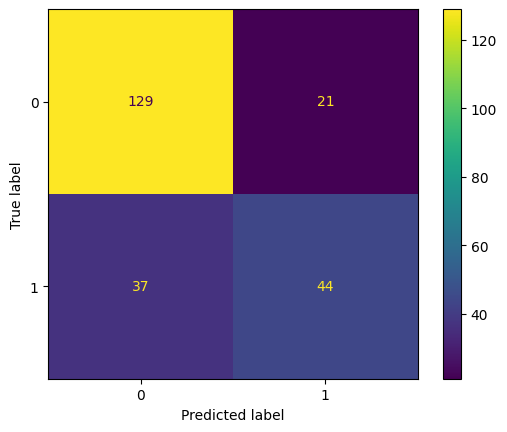

In [50]:
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)

In [51]:
# Recall
# tp / (tp + fn)
44 / (44 + 37)

0.5432098765432098

In [52]:
print(rf.feature_importances_, X.columns)

[0.09618114 0.27261542 0.08923178 0.06921103 0.07317795 0.15091165
 0.11820937 0.13046167] Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


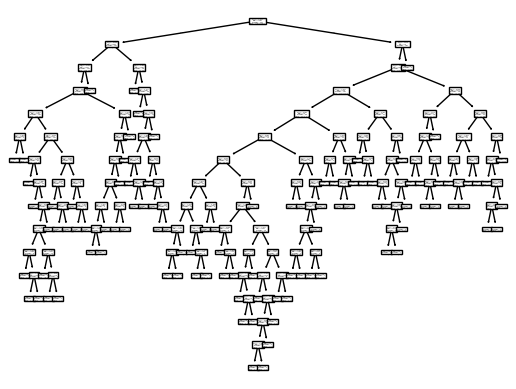

In [53]:
import matplotlib.pyplot as plt

rf_tree = rf.estimators_[4]
tree.plot_tree(rf_tree)
plt.savefig("rf_tree.jpg")

In [54]:
%pip install xgboost


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.2.5/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [55]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

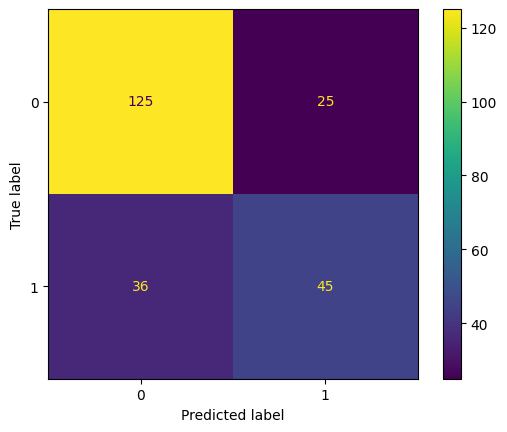

In [56]:
ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test)

In [57]:
from sklearn.metrics import roc_curve, roc_auc_score
# ROC = Receiving Operating Characteristic curve
# ROC curves summarize the trade-off between true positives and false positives. They are most appropriate for balanced datasets. They can
# be overly optimistic for severly imbalanced classification problems.

print(type(y_test))
print(type(y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print(fpr, tpr)

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
[0.         0.16666667 1.        ] [0.         0.55555556 1.        ]


Text(0, 0.5, 'True Positive Rate')

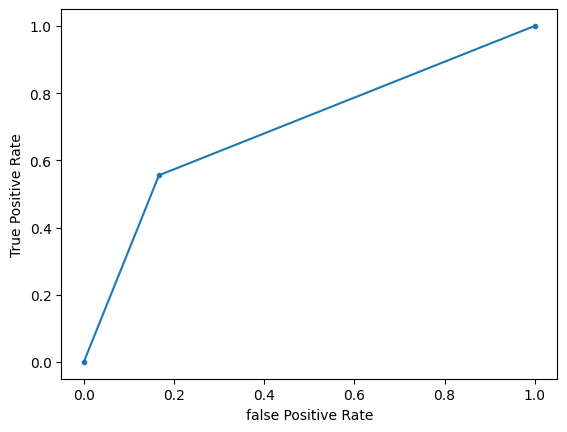

In [58]:
plt.plot(fpr, tpr, marker = ".")
plt.xlabel("false Positive Rate")
plt.ylabel("True Positive Rate")

In [59]:
# Precision-recall curve summarizes the tradeoff between true positive rate and positive values. These are ideal for imbalanced datasets
# (where one outcome is 10 times or more likely than another)
from sklearn.metrics import precision_recall_curve, f1_score, auc

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)
pr_auc

np.float64(0.6771284271284271)

Text(0, 0.5, 'Precision')

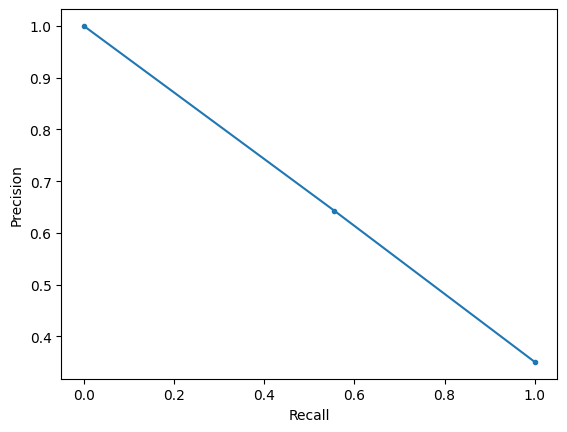

In [61]:
plt.plot(recall, precision, marker = ".")
plt.xlabel("Recall")
plt.ylabel("Precision")

In [62]:
# f1 score = 2 * precision * recall / (precision + recall)
# Combined precision and recall scores are used to compute how many times the model made a correct prediction across the whole dataset.
f1 = f1_score(y_test, y_pred)
f1

np.float64(0.5960264900662252)